In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_csv("C:\\Users\\pooja\\OneDrive\\Desktop\\Internship\\avocado.csv\\avocado.csv")
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
data.shape

(18249, 14)

In [5]:
data= data.drop(columns=['Unnamed: 0','Date'])

In [6]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
# checking for missing values
data.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
N_data= data.drop(columns=['region','type'])
C_data= data[['region','type']]

In [10]:
C_data.nunique()

region    54
type       2
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

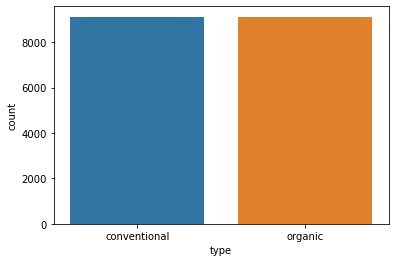

In [11]:
sns.countplot(x='type',data=data)

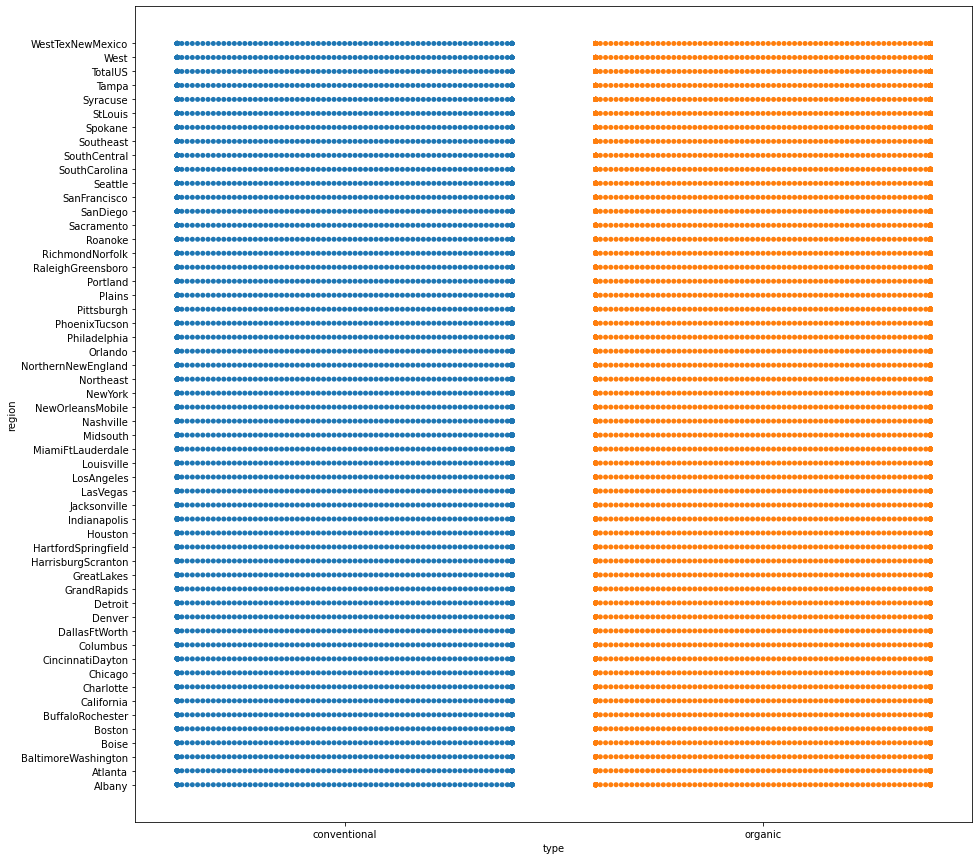

In [12]:
plt.figure(figsize=(15,15))
sns.swarmplot(x='type',y='region',data=data)
plt.show()

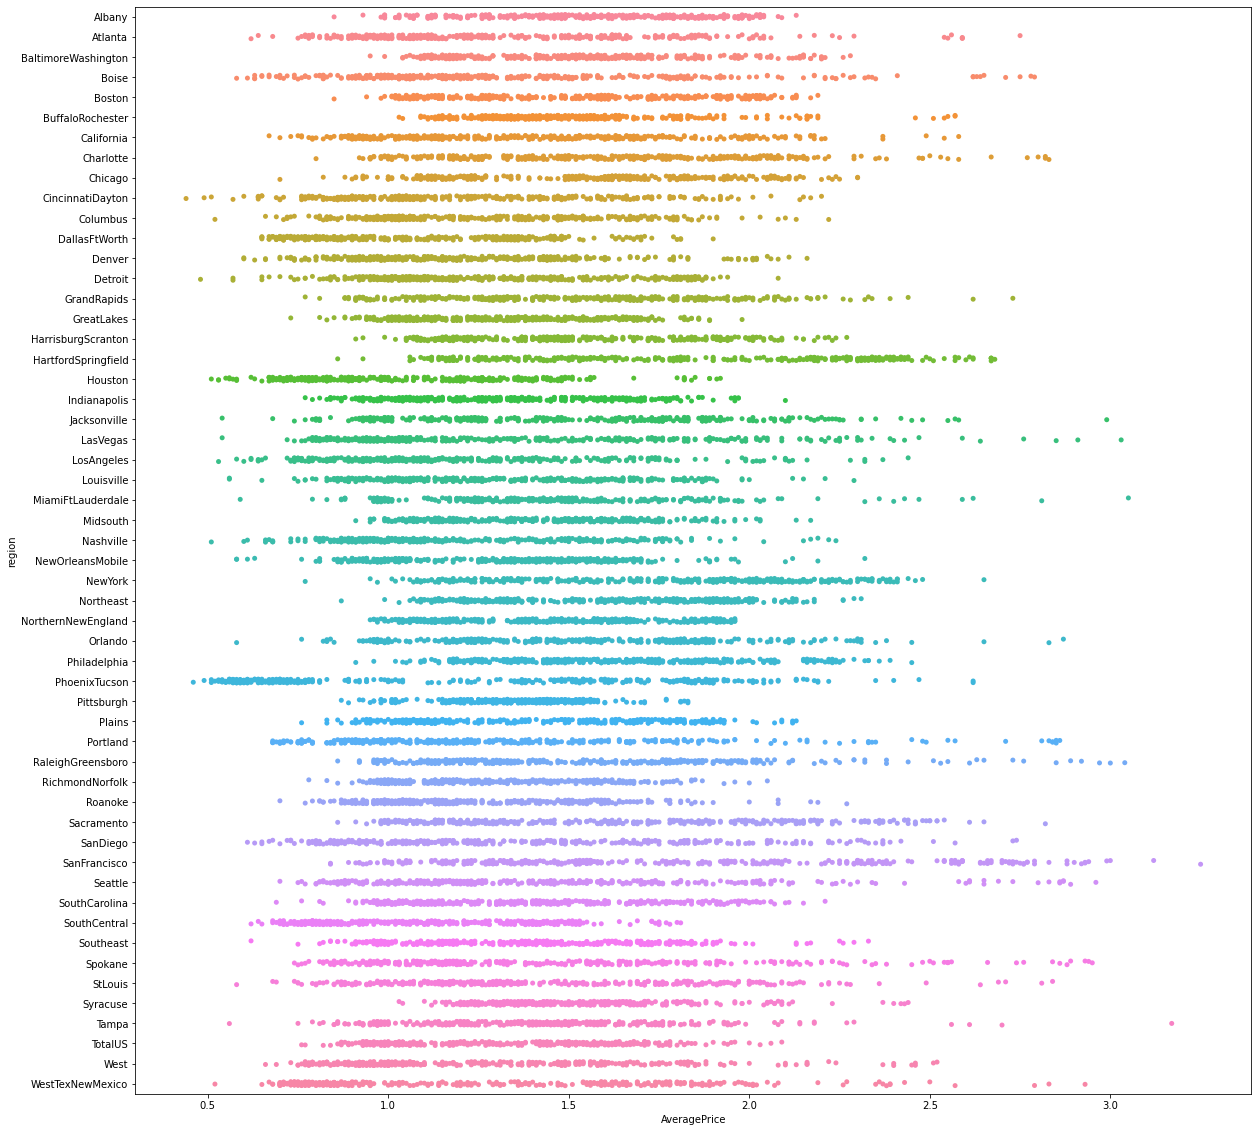

In [13]:
plt.figure(figsize=(20,20))
sns.stripplot(x="AveragePrice",y="region",data=data)
plt.show()

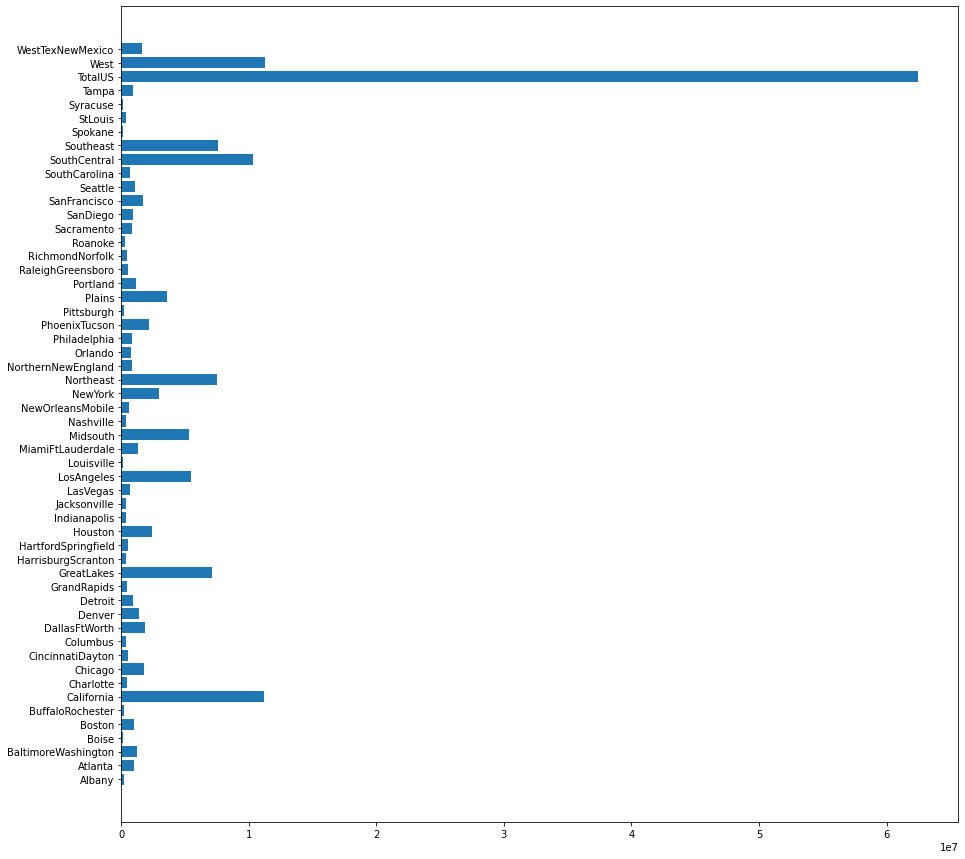

In [14]:
plt.figure(figsize=(15,15))
x=data['Total Volume']
y=data['region']
plt.barh(y,x)
plt.show()

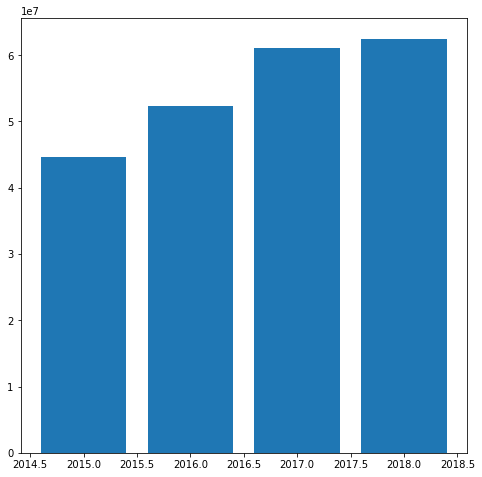

In [15]:
plt.figure(figsize=(8,8))
x=data['year']
y=data['Total Volume']
plt.bar(x,y)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

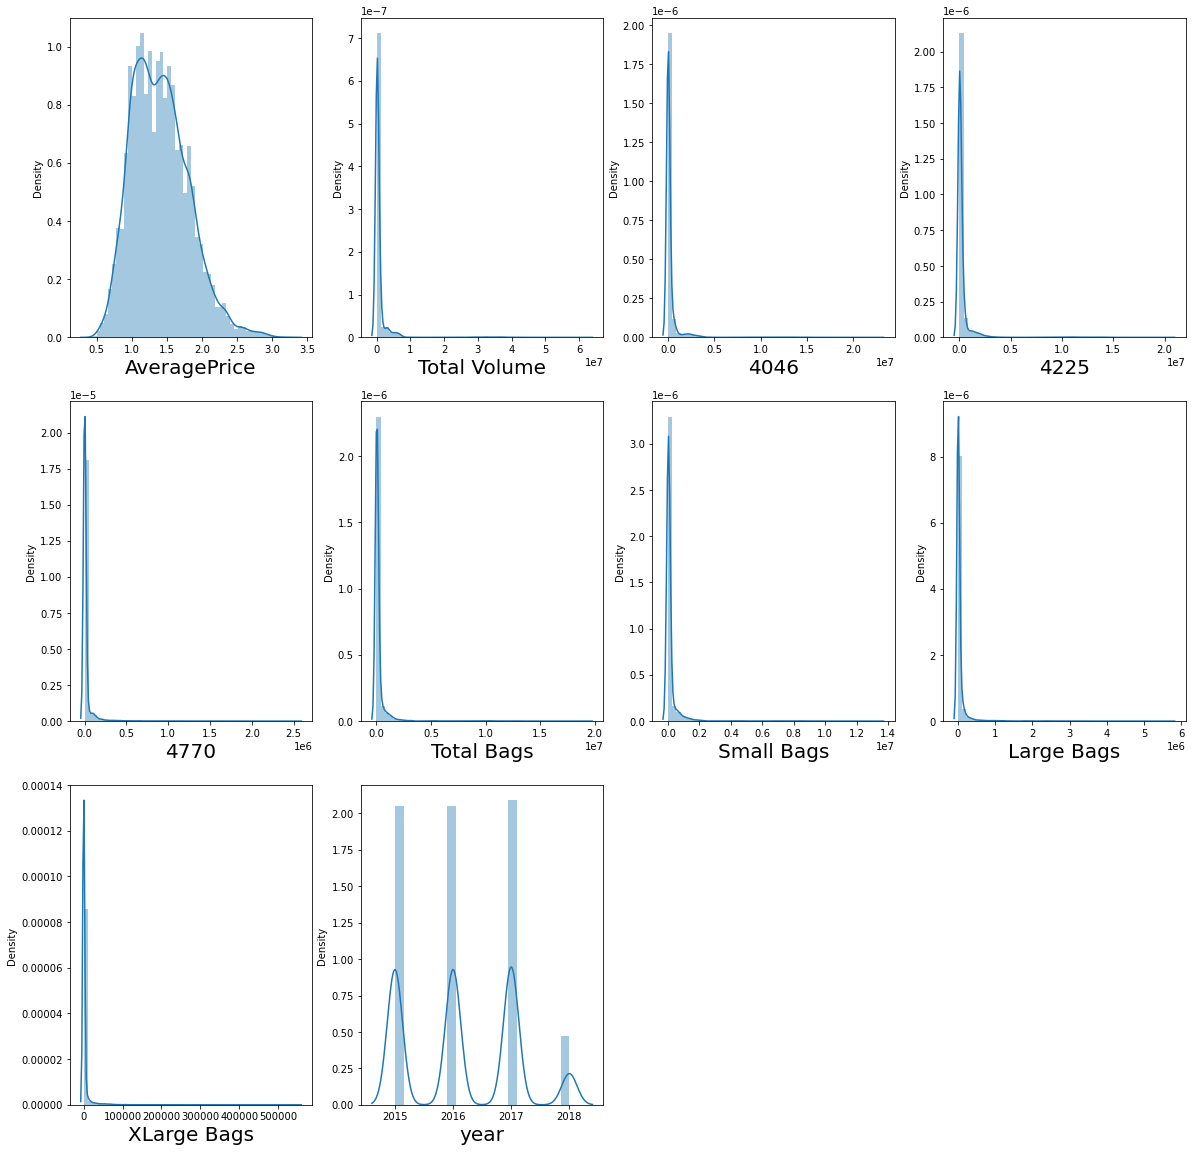

In [16]:
#Plotting graphs for numerical data
plt.figure(figsize=(20,20))
plotnumber = 1
for column in N_data:
    if plotnumber <=10:
        ax= plt.subplot(3,4,plotnumber)
        sns.distplot(N_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [17]:
#checking for skewness
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [18]:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [19]:
data.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,2015,0
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,0,2015,0
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,2015,0
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,0,2015,0
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,0,2015,0


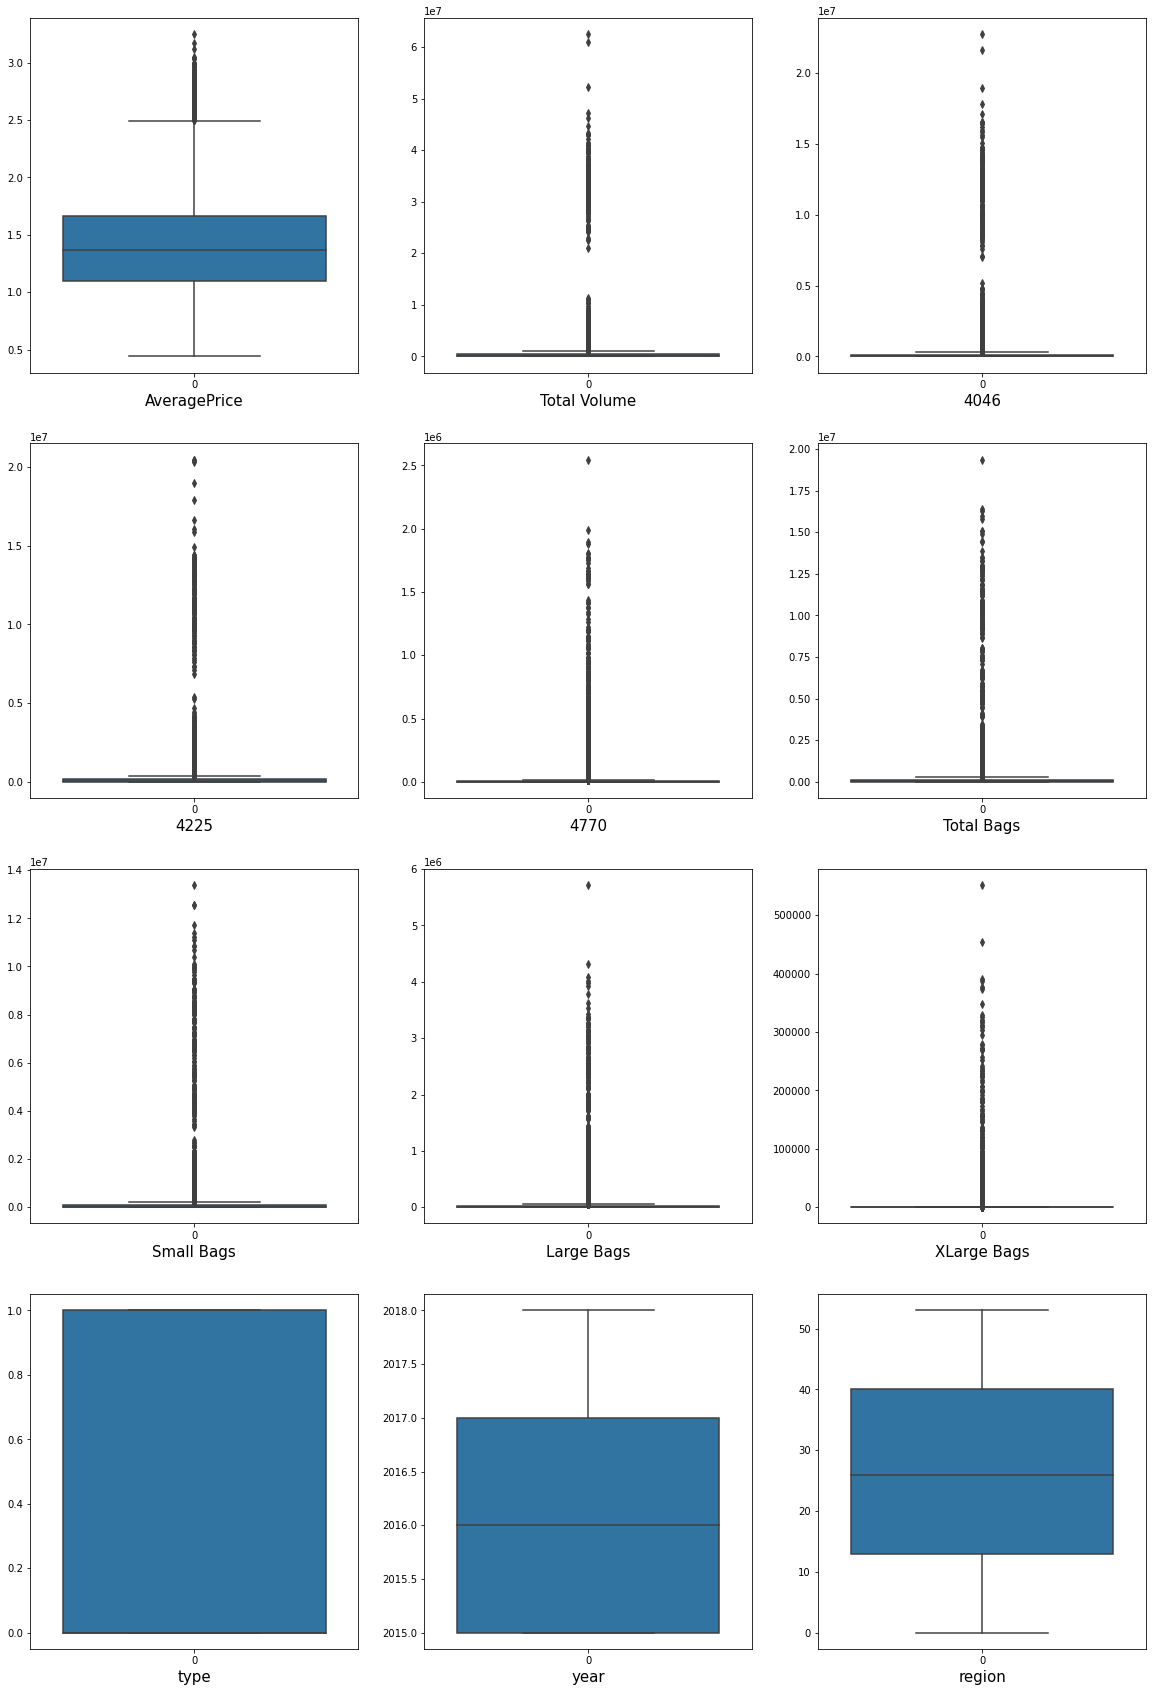

In [20]:
# Checking for outliers using boxplot
plt.figure(figsize=(20,30))
graph =1
for column in data:
    if graph <=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [21]:
# Using z-score to detect and treat the outliers
features=data.drop('region',axis=1)
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [22]:
clf_data=data.drop(outliers[0])
clf_data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [23]:
data_loss=((18248-17561)/18248)*100
data_loss

3.7647961420429636

In [24]:
reg_features=data.drop('AveragePrice',axis=1)
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(reg_features))
threshold=3
reg_outliers = np.where(z>3)
reg_outliers

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [25]:
reg_data=data.drop(reg_outliers[0])
reg_data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [26]:
data_loss=((18248-17782)/18248)*100
data_loss

2.5537045155633495

In [27]:
#checking for skewness
clf_data.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [28]:
reg_data.skew()


AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

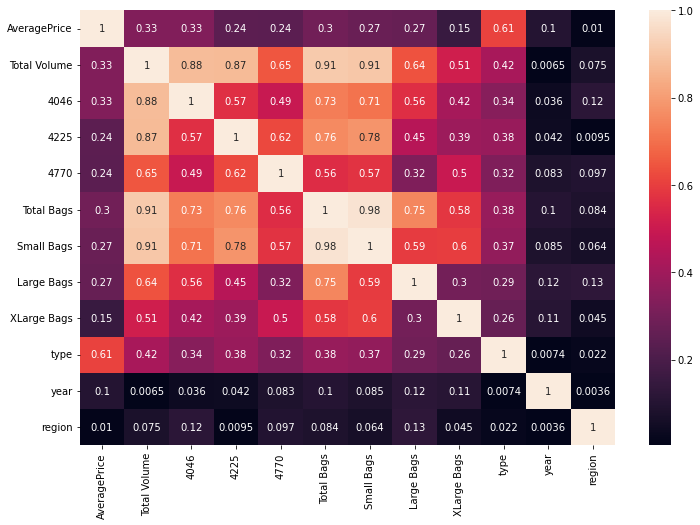

In [29]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
#Regression data
df_corr = reg_data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()


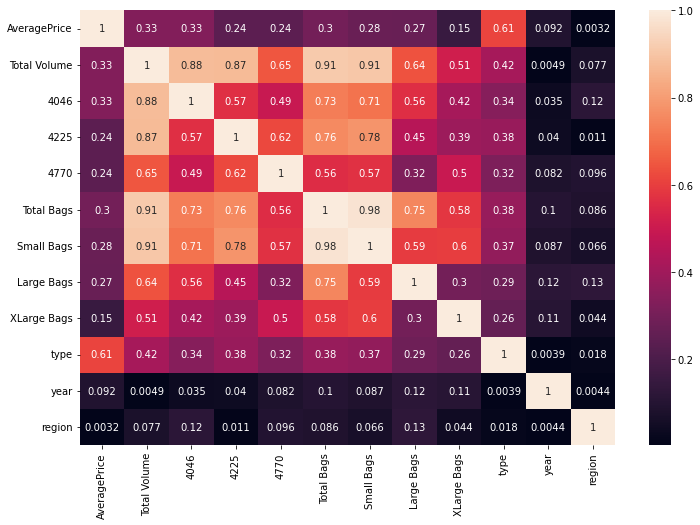

In [30]:
#Classification data
df_corr = clf_data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [31]:
# Dividing data into feature and label
X= reg_data.drop(columns=['AveragePrice'])
Y= reg_data['AveragePrice']

In [32]:
#Applying PowerTransformer
pt = PowerTransformer()
X_scaled = pd.DataFrame(pt.fit_transform(X), columns=X.columns)


In [33]:
X_scaled

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,-1.026443,-5.271339e-13,-2.009197
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,-1.026443,-5.271339e-13,-2.009197
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,-1.026443,-5.271339e-13,-2.009197
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,-1.026443,-5.271339e-13,-2.009197
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,-1.026443,-5.271339e-13,-2.009197
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702,0.974238,8.574808e-13,1.576337
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702,0.974238,8.574808e-13,1.576337
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702,0.974238,8.574808e-13,1.576337
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702,0.974238,8.574808e-13,1.576337


In [34]:
X_scaled.skew()

Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
year            0.000000
region         -0.260077
dtype: float64

In [35]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,52.032393,Total Volume
1,7.146315,4046
2,11.177169,4225
3,3.940581,4770
4,34.427518,Total Bags
5,16.630915,Small Bags
6,3.463038,Large Bags
7,2.042375,XLarge Bags
8,3.718984,type
9,1.323292,year


In [36]:
X_scaled1= X_scaled.drop(columns=['Total Volume'])


In [37]:
#Calculating the VIFs again
vif1= pd.DataFrame()
vif1['vif']=[variance_inflation_factor(X_scaled1,i) for i in range(X_scaled1.shape[1])]
vif1['feature']= X_scaled1.columns
vif1

,vif,feature
0,3.724145,4046
1,4.273179,4225
2,3.927632,4770
3,24.467624,Total Bags
4,16.630575,Small Bags
5,3.420798,Large Bags
6,2.027475,XLarge Bags
7,3.504297,type
8,1.321877,year
9,1.080434,region


In [38]:
X_scaled2= X_scaled1.drop(columns=['Total Bags'])

In [39]:
#Calculating the VIFs again
vif2= pd.DataFrame()
vif2['vif']=[variance_inflation_factor(X_scaled2,i) for i in range(X_scaled2.shape[1])]
vif2['feature']= X_scaled2.columns
vif2

,vif,feature
0,3.705901,4046
1,4.130449,4225
2,3.927316,4770
3,4.071201,Small Bags
4,1.861905,Large Bags
5,2.027143,XLarge Bags
6,3.500862,type
7,1.299001,year
8,1.080434,region


In [40]:
#traintestsplit
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split (X_scaled2,Y, test_size=0.3, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",r2_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",r2_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  0 the model performs well
Acuraccy of training model : 47.15866239002662
Accuracy of testing model : 47.05898489184054

-----------------------------------------

At random state  3 the model performs well
Acuraccy of training model : 47.134087908816916
Accuracy of testing model : 47.13911719648556

-----------------------------------------

At random state  5 the model performs well
Acuraccy of training model : 47.29258532069798
Accuracy of testing model : 46.76047886029343

-----------------------------------------

At random state  6 the model performs well
Acuraccy of training model : 46.973428945566596
Accuracy of testing model : 47.44354755530473

-----------------------------------------

At random state  10 the model performs well
Acuraccy of training model : 47.160467676988226
Accuracy of testing model : 47.053925041307956

-----------------------------------------

At random state  14 the model performs well
Acuraccy of training model : 47.23730305099314
Accu

At random state  95 the model performs well
Acuraccy of training model : 47.19981119580008
Accuracy of testing model : 46.9572685088533

-----------------------------------------

At random state  96 the model performs well
Acuraccy of training model : 47.315213301737515
Accuracy of testing model : 46.67534945153255

-----------------------------------------

At random state  98 the model performs well
Acuraccy of training model : 47.24915116314256
Accuracy of testing model : 46.84753679500695

-----------------------------------------

At random state  103 the model performs well
Acuraccy of training model : 47.1519112620628
Accuracy of testing model : 47.030787525170204

-----------------------------------------

At random state  105 the model performs well
Acuraccy of training model : 47.3156401354238
Accuracy of testing model : 46.71429310609698

-----------------------------------------

At random state  106 the model performs well
Acuraccy of training model : 47.12084791924551
Ac

At random state  192 the model performs well
Acuraccy of training model : 47.1797985405119
Accuracy of testing model : 46.992306204051914

-----------------------------------------

At random state  193 the model performs well
Acuraccy of training model : 47.33670417517622
Accuracy of testing model : 46.65077194196474

-----------------------------------------

At random state  194 the model performs well
Acuraccy of training model : 47.16700622940273
Accuracy of testing model : 47.008855701698195

-----------------------------------------

At random state  198 the model performs well
Acuraccy of training model : 47.125442561209276
Accuracy of testing model : 47.14881385724075

-----------------------------------------

At random state  199 the model performs well
Acuraccy of training model : 47.25886573127988
Accuracy of testing model : 46.81924928260934

-----------------------------------------

At random state  201 the model performs well
Acuraccy of training model : 47.21893052911

At random state  296 the model performs well
Acuraccy of training model : 47.01428078700155
Accuracy of testing model : 47.40194144765548

-----------------------------------------

At random state  298 the model performs well
Acuraccy of training model : 47.26203941070257
Accuracy of testing model : 46.82757792935919

-----------------------------------------

At random state  301 the model performs well
Acuraccy of training model : 47.0346069386123
Accuracy of testing model : 47.360985213119335

-----------------------------------------

At random state  302 the model performs well
Acuraccy of training model : 47.203536911471886
Accuracy of testing model : 46.90860842583917

-----------------------------------------

At random state  304 the model performs well
Acuraccy of training model : 47.21622816411583
Accuracy of testing model : 46.93975095237344

-----------------------------------------

At random state  306 the model performs well
Acuraccy of training model : 47.033170953158

Acuraccy of training model : 47.28279176552713
Accuracy of testing model : 46.7644714688513

-----------------------------------------

At random state  403 the model performs well
Acuraccy of training model : 47.16827498822818
Accuracy of testing model : 47.05437129604224

-----------------------------------------

At random state  404 the model performs well
Acuraccy of training model : 47.121960168491206
Accuracy of testing model : 47.15740630558809

-----------------------------------------

At random state  405 the model performs well
Acuraccy of training model : 47.26338082260639
Accuracy of testing model : 46.826824579669015

-----------------------------------------

At random state  407 the model performs well
Acuraccy of training model : 47.386504235671
Accuracy of testing model : 46.51125436250547

-----------------------------------------

At random state  408 the model performs well
Acuraccy of training model : 47.20201808334584
Accuracy of testing model : 46.9302773375284

At random state  500 the model performs well
Acuraccy of training model : 46.9671048151035
Accuracy of testing model : 47.4694904403838

-----------------------------------------

At random state  501 the model performs well
Acuraccy of training model : 47.06902879350974
Accuracy of testing model : 47.26629000074196

-----------------------------------------

At random state  503 the model performs well
Acuraccy of training model : 47.127406105653755
Accuracy of testing model : 47.09796644032417

-----------------------------------------

At random state  506 the model performs well
Acuraccy of training model : 47.29858758892621
Accuracy of testing model : 46.715638714523166

-----------------------------------------

At random state  509 the model performs well
Acuraccy of training model : 47.06033983787764
Accuracy of testing model : 47.2830442008188

-----------------------------------------

At random state  512 the model performs well
Acuraccy of training model : 46.98574691770797

Acuraccy of training model : 47.201605682068774
Accuracy of testing model : 46.98397224229326

-----------------------------------------

At random state  610 the model performs well
Acuraccy of training model : 47.10090809310468
Accuracy of testing model : 47.213915932851

-----------------------------------------

At random state  611 the model performs well
Acuraccy of training model : 47.19130954341869
Accuracy of testing model : 46.99549450123853

-----------------------------------------

At random state  612 the model performs well
Acuraccy of training model : 47.18865361166377
Accuracy of testing model : 46.960049349427415

-----------------------------------------

At random state  614 the model performs well
Acuraccy of training model : 47.146517462408255
Accuracy of testing model : 47.029016000714776

-----------------------------------------

At random state  617 the model performs well
Acuraccy of training model : 47.10760001491313
Accuracy of testing model : 47.1614363976

Acuraccy of training model : 47.38610789241298
Accuracy of testing model : 46.545301081842375

-----------------------------------------

At random state  702 the model performs well
Acuraccy of training model : 47.0535244653448
Accuracy of testing model : 47.322674465158244

-----------------------------------------

At random state  704 the model performs well
Acuraccy of training model : 47.08208571965471
Accuracy of testing model : 47.240011057786944

-----------------------------------------

At random state  705 the model performs well
Acuraccy of training model : 47.026838727763064
Accuracy of testing model : 47.39659391057786

-----------------------------------------

At random state  706 the model performs well
Acuraccy of training model : 47.124981649638556
Accuracy of testing model : 47.073585592522264

-----------------------------------------

At random state  710 the model performs well
Acuraccy of training model : 47.34373530041086
Accuracy of testing model : 46.6044737

Acuraccy of training model : 47.35822970027996
Accuracy of testing model : 46.61431580539629

-----------------------------------------

At random state  796 the model performs well
Acuraccy of training model : 47.09331463176588
Accuracy of testing model : 47.23523793143044

-----------------------------------------

At random state  798 the model performs well
Acuraccy of training model : 46.98887505579009
Accuracy of testing model : 47.41350679151578

-----------------------------------------

At random state  799 the model performs well
Acuraccy of training model : 47.13428251560223
Accuracy of testing model : 47.09685874656997

-----------------------------------------

At random state  803 the model performs well
Acuraccy of training model : 47.04846986244565
Accuracy of testing model : 47.3299366218481

-----------------------------------------

At random state  804 the model performs well
Acuraccy of training model : 47.225665747326616
Accuracy of testing model : 46.885741983197

At random state  882 the model performs well
Acuraccy of training model : 47.31083668716298
Accuracy of testing model : 46.72747892784807

-----------------------------------------

At random state  883 the model performs well
Acuraccy of training model : 47.166898240982725
Accuracy of testing model : 47.03036271516915

-----------------------------------------

At random state  884 the model performs well
Acuraccy of training model : 47.24073212926039
Accuracy of testing model : 46.876528926396475

-----------------------------------------

At random state  888 the model performs well
Acuraccy of training model : 47.286429327352984
Accuracy of testing model : 46.75991095339129

-----------------------------------------

At random state  889 the model performs well
Acuraccy of training model : 47.330624432463196
Accuracy of testing model : 46.67139708095658

-----------------------------------------

At random state  891 the model performs well
Acuraccy of training model : 46.988543813

At random state  994 the model performs well
Acuraccy of training model : 46.98530213928072
Accuracy of testing model : 47.445832657229836

-----------------------------------------

At random state  997 the model performs well
Acuraccy of training model : 46.99771065504872
Accuracy of testing model : 47.431682415855924

-----------------------------------------

At random state  998 the model performs well
Acuraccy of training model : 47.16128547688775
Accuracy of testing model : 47.05921616593534

-----------------------------------------



In [41]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled2,Y, test_size=0.3, random_state = 224)

In [42]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)

    print (algorithm)
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [43]:
#Training Model
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)


#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

#Support Vector Regressor:
svr = SVR()
model_selection(svr,x_train,y_train,x_test,y_test)



LinearRegression()
Acuraccy of training model : 0.4719138599475031
Accuracy of testing model : 0.47000124859994563
RMSE :  0.29403390496170473

-----------------------------------------

DecisionTreeRegressor()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.5894905248558233
RMSE :  0.2587745614709449

-----------------------------------------

RandomForestRegressor()
Acuraccy of training model : 0.9728130338186475
Accuracy of testing model : 0.8062244586404166
RMSE :  0.1777908752216771

-----------------------------------------

SVR()
Acuraccy of training model : 0.6509623646346226
Accuracy of testing model : 0.6423236221694733
RMSE :  0.24154892990113658

-----------------------------------------



In [44]:
# Hyperparameter Tuning:
parameters = {'n_estimators':(25,50,75,100),
    'max_features':['auto','sqrt','log2'],
    'max_depth': (8,12,15),
    'min_samples_leaf': (5,8,10),
    'min_samples_split':range(5,7,10)
    }

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [45]:
rf1= RandomForestRegressor(n_estimators=100,max_features='auto', max_depth = 15, min_samples_leaf = 5, min_samples_split = 5)
model_selection(rf1,x_train,y_train,x_test,y_test)

RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=5,
                      min_samples_split=5)
Acuraccy of training model : 0.8937256919684733
Accuracy of testing model : 0.7833221942510811
RMSE :  0.18800404910033103

-----------------------------------------



In [46]:
# Saving Model
import pickle
filename= 'Avacdo_reg.pkl'
pickle.dump(rf,open(filename, 'wb'))

In [47]:
#Final Prediction
a= np.array(y_test)
predicted=np.array (rf.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,0.99,0.9986
1,1.75,1.6844
2,1.21,1.4209
3,1.02,0.8854
4,2.43,2.3219
...,...,...
5330,1.69,1.5412
5331,1.59,1.7124
5332,2.06,2.0536
5333,0.96,0.9972


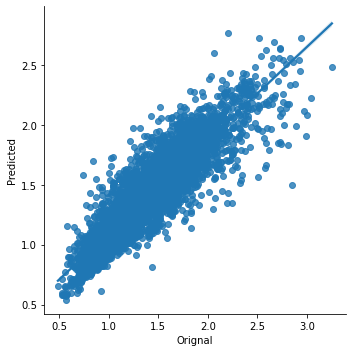

In [48]:
sns.lmplot(x='Orignal',y='Predicted',data=df)

In [49]:
# Dividing data into feature and label
x= clf_data.drop(columns=['region'])
y= clf_data['region']

In [50]:
#Applying PowerTransformer
pt = PowerTransformer()
x_scaled = pd.DataFrame(pt.fit_transform(x), columns=x.columns)

In [51]:
x_scaled

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210647
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210647
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210647
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210647
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210647
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.978707
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.978707
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.978707
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.978707


In [52]:
x_scaled.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
dtype: float64

In [53]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif= pd.DataFrame()
Vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif['feature']= x_scaled.columns
Vif

,vif,feature
0,2.127152,AveragePrice
1,54.863391,Total Volume
2,6.905481,4046
3,12.362805,4225
4,3.941440,4770
5,35.756710,Total Bags
6,17.333635,Small Bags
7,3.472647,Large Bags
8,2.039068,XLarge Bags
9,4.115674,type


In [54]:
x_scaled=x_scaled.drop(columns=['Total Volume','Total Bags'])

In [55]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif1= pd.DataFrame()
Vif1['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif1['feature']= x_scaled.columns
Vif1

,vif,feature
0,1.913817,AveragePrice
1,3.602702,4046
2,4.314199,4225
3,3.930990,4770
4,4.119981,Small Bags
5,2.038690,Large Bags
6,2.027128,XLarge Bags
7,3.961605,type
8,1.355953,year


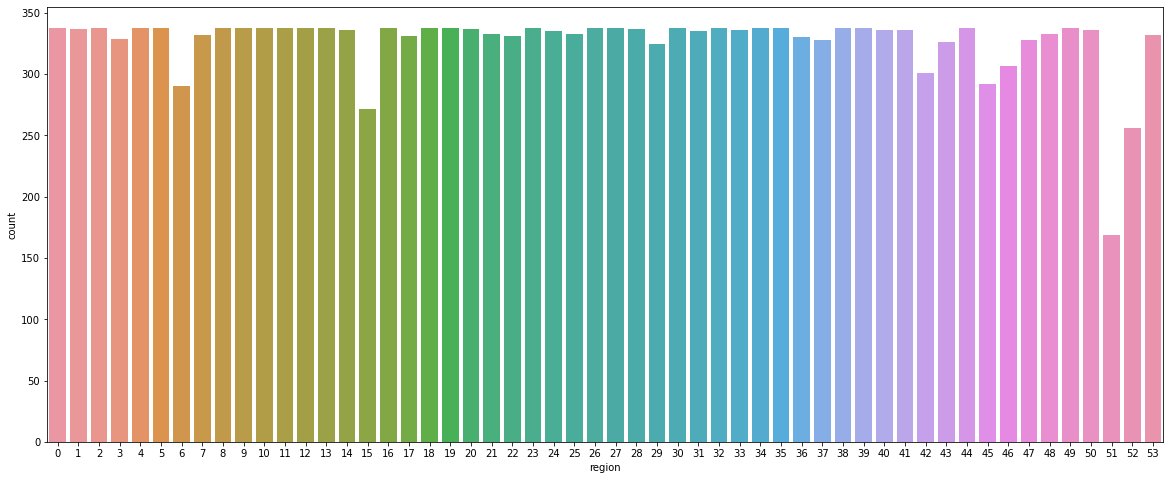

In [56]:
plt.figure(figsize=(20,8))
sns.countplot(y)
plt.show()

In [57]:
#traintestsplit
lg = LogisticRegression()
for i in range(300,500):
    x_train,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.3, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  303 the model performs well
Acuraccy of training model : 50.15783083771752
Accuracy of testing model : 50.283232628398785

-----------------------------------------

At random state  311 the model performs well
Acuraccy of training model : 50.02832861189802
Accuracy of testing model : 49.52794561933535

-----------------------------------------

At random state  314 the model performs well
Acuraccy of training model : 50.04451639012546
Accuracy of testing model : 49.8678247734139

-----------------------------------------

At random state  315 the model performs well
Acuraccy of training model : 50.08498583569405
Accuracy of testing model : 50.41540785498489

-----------------------------------------

At random state  316 the model performs well
Acuraccy of training model : 50.45730473492513
Accuracy of testing model : 49.67900302114804

-----------------------------------------

At random state  318 the model performs well
Acuraccy of training model : 50.1902063941724

In [58]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.3, random_state = 446)

In [59]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    
    print(algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    print ("\n-----------------------------------------\n")
    
        

In [60]:
#Logistic Regression
lr= LogisticRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train,y_train,x_test,y_test)

#Decision Tree
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Random Forest 
rfc= RandomForestClassifier()
model_selection(rfc,x_train,y_train,x_test,y_test)



LogisticRegression()
Acuraccy of training model : 0.5027923917442331
Accuracy of testing model : 0.502643504531722
Confusion Matrix 
 [[66  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  6]
 ...
 [ 0  0  0 ... 41  1  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  6  3 ...  0  0 12]]

-----------------------------------------

KNeighborsClassifier()
Acuraccy of training model : 0.8997167138810198
Accuracy of testing model : 0.8259063444108762
Confusion Matrix 
 [[103   0   0 ...   0   0   0]
 [  0  76   0 ...   0   0   2]
 [  0   0 103 ...   0   0   0]
 ...
 [  0   0   0 ...  42   0   0]
 [  0   0   0 ...   0  79   0]
 [  0   0   2 ...   0   0  78]]

-----------------------------------------

DecisionTreeClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.7966389728096677
Confusion Matrix 
 [[82  0  0 ...  0  0  0]
 [ 0 83  0 ...  0  0  1]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ...  0 78  0]
 [ 0  0  2 ...  0  0 67]]

------------

In [61]:
# Hyperparameter Tuning :

#Decision Tree
parameters = {'criterion':['gini','entropy'],
    'max_depth': range(10,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = GridSearchCV(dtc,parameters)
clf.fit(x_train,y_train)
print ("DecisionTree: \n",clf.best_params_)

#KNN
parameters = {'algorithm':['kd-tree','brute'],
    'leaf_size': range(3,7),
    'n_neighbors': range(3,10)
    }

clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print ("KNN: \n",clf.best_params_)

#RandomForests
parameters = {'criterion':['gini','entropy'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(3,5,7),
    'min_samples_split':range(3,6),
    'n_estimators':(50,75,100)
    }

clf = GridSearchCV(rfc,parameters)
clf.fit(x_train,y_train)
print ("RandomForests: \n",clf.best_params_)

DecisionTree: 
 {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 4}
KNN: 
 {'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 3}
RandomForests: 
 {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [65]:
#KNN
knn1= KNeighborsClassifier(algorithm='brute',leaf_size=3,n_neighbors=3)
model_selection(knn1,x_train,y_train,x_test,y_test)

#Decision Tree
dtc1 = DecisionTreeClassifier(criterion='entropy',max_depth=11,min_samples_leaf=2,min_samples_split=4)
model_selection(dtc1,x_train,y_train,x_test,y_test)

#Random Forest 
rfc1= RandomForestClassifier(criterion='entropy',max_depth=11,min_samples_leaf=3,min_samples_split=4,n_estimators=100)
model_selection(rfc1,x_train,y_train,x_test,y_test)

KNeighborsClassifier(algorithm='brute', leaf_size=3, n_neighbors=3)
Acuraccy of training model : 0.9312828814245245
Accuracy of testing model : 0.8462990936555891
Confusion Matrix 
 [[105   0   0 ...   0   0   0]
 [  0  86   0 ...   0   0   1]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ...  42   0   0]
 [  0   0   0 ...   0  80   0]
 [  0   0   0 ...   0   0  80]]

-----------------------------------------

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=4)
Acuraccy of training model : 0.8436260623229461
Accuracy of testing model : 0.7443353474320241
Confusion Matrix 
 [[89  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  4]
 [ 0  0 98 ...  0  0  3]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 77  0]
 [ 0  2  4 ...  0  0 66]]

-----------------------------------------

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=4)
Acuraccy of training mod

In [66]:
# Saving Model
import pickle
filename= 'Avacado_clf.pkl'
pickle.dump(rfc1,open(filename, 'wb'))

In [67]:
#Final Prediction
a= L_encoder.inverse_transform(np.array(y_test))
predicted=L_encoder.inverse_transform(np.array (rfc1.predict(x_test)))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,LasVegas,SouthCarolina
1,Columbus,Columbus
2,GreatLakes,GreatLakes
3,BaltimoreWashington,BaltimoreWashington
4,Charlotte,Charlotte
...,...,...
5291,LosAngeles,LosAngeles
5292,Northeast,Southeast
5293,HartfordSpringfield,HartfordSpringfield
5294,StLouis,StLouis
